In [2]:
import pandas as pd
import numpy as np

In [3]:
raw = 'C:/Users/anton/Resources/Homeworks/MatPlotLib/Files/city_data.csv'
df2 = pd.read_csv(raw)
df2.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
raw = 'C:/Users/anton/Resources/Homeworks/MatPlotLib/Files/ride_data.csv'
df = pd.read_csv(raw)
df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
df = pd.merge(df, df2, on='city', how='right')
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [6]:
city_groups = df.groupby("city")
city_fare_average = city_groups['fare'].mean()
city_type = (city_groups["ride_id"].count())
city_drivers = (city_groups['driver_count'].unique())
city_urban = (city_groups["type"].unique())

city_complete = pd.DataFrame(city_fare_average)
city_complete.columns = ['Avg Fare Per City']
city_complete['Total Rides per City'] = city_type.squeeze()
city_complete['Total Drivers'] = city_drivers.squeeze()
city_complete['Type'] = city_urban

city_complete.head()

,Avg Fare Per City,Total Rides per City,Total Drivers,Type
city,,,,
Amandaburgh,24.641667,18,[12],[Urban]
Barajasview,25.332273,22,[26],[Urban]
Barronchester,36.422500,16,[11],[Suburban]
Bethanyland,32.956111,18,[22],[Suburban]
Bradshawfurt,40.064000,10,[7],[Rural]


In [7]:
total_length = df['city'].count()
total_sum = df['fare'].sum()
total_drivers11 = city_complete['Total Drivers']
total_length
total_sum


63538.64

In [11]:

import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [16]:
urban = df[df['type'] == 'Urban']
suburban = df[df['type'] == 'Suburban']
rural = df[df['type'] == 'Rural']

fare_av = urban.groupby('city').mean()['fare']
d_count = urban.groupby('city').count()['driver_count']
r_id = urban.groupby('city').count()['ride_id']

fare_av1 = suburban.groupby('city').mean()['fare']
d_count1 = suburban.groupby('city').count()['driver_count']
r_id1 = suburban.groupby('city').count()['ride_id']

fare_av2 = rural.groupby('city').mean()['fare']
d_count2 = rural.groupby('city').count()['driver_count']
r_id2 = rural.groupby('city').count()['ride_id']



<IPython.core.display.Javascript object>


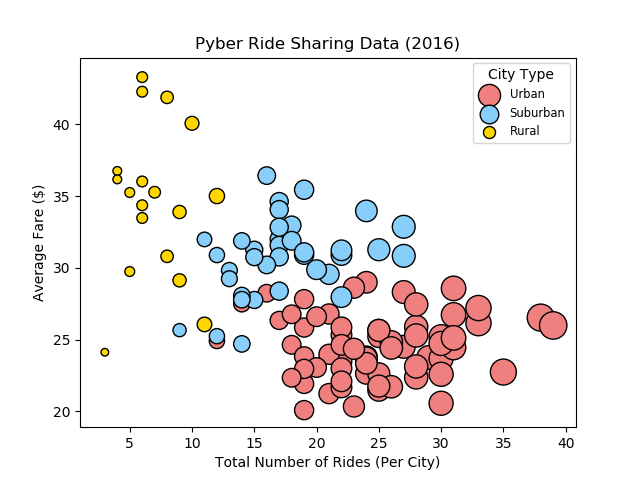

In [17]:
plt.scatter(r_id, fare_av, marker='o', s=d_count*10, facecolors='lightcoral', edgecolors='black', label='Urban')
plt.scatter(r_id1, fare_av1, marker='o', s=d_count1*10, facecolors='lightskyblue', edgecolors='black', label='Suburban')
plt.scatter(r_id2, fare_av2, marker='o', s=d_count2*10, facecolors='gold', edgecolors='black', label='Rural')

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")



lgnd = plt.legend(fontsize="small", mode="Expanded", numpoints=1, scatterpoints=1, loc="best", title="City Type", labelspacing=0.5)

In [10]:
city_type = df.groupby(["type"])
total_drivers = city_type['driver_count'].unique()

total_drivers1

NameError: name 'total_drivers1' is not defined

In [13]:
city_type = df.groupby(["type"])
city_type_average = city_type['city'].count()
city_type_rides = city_type["ride_id"].unique()
total_drivers = city_complete['Total Drivers']
total_fare = city_type["fare"].sum()


city_type_complete = pd.DataFrame(city_type_average)
city_type_complete['Percentage of Rides by City Type'] = city_type_average/total_length * 100
city_type_complete['Percentage of Fares by City Type'] = total_fare/total_sum * 100
city_type_complete['Percentage of Drivers by City Type'] = (total_drivers/total_drivers11)* 100

city_type_complete

,city,Percentage of Rides by City Type,Percentage of Fares by City Type,Percentage of Drivers by City Type
type,,,,
Rural,125,5.263158,6.811493,NaN
Suburban,625,26.315789,30.463872,NaN
Urban,1625,68.421053,62.724635,NaN


In [ ]:
city_type_complete['Percentage of Drivers by City Type'][0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
city_type = df2.groupby(["type"]).sum()['driver_count']/df2['driver_count'].sum() * 100
city_type

In [ ]:
%matplotlib notebook

In [ ]:
labels = ['Rural', 'Suburban', 'Urban']
Percentage_of_rides = ['5.26', '26.31', '68.42']
Percentage_of_fares = ['6.81', '30.46', '62.72']

colors = ['Gold', 'Lightskyblue', 'Lightcoral']

In [ ]:
plt.pie(Percentage_of_rides, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140, colors=colors)
plt.title('Percentage of Rides by City Type')


In [ ]:
%matplotlib notebook

In [ ]:
plt.pie(Percentage_of_fares, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140, colors=colors)
plt.title('Percentage of Fares by City Type')

In [ ]:
%matplotlib notebook

In [ ]:
plt.pie(city_type, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140, colors=colors)
plt.title('Percentage of Drivers by City Type')

In [ ]:
#1. From the data, one can conclude that the majority of users are completely focused on urban areas. Pyber would have to focus on these areas if the business is to prove succesful.  

In [ ]:
# 2. There are limitations in the data which could tell us a lot, one would be interested in finding out why certain cities have such a small amount of drivers. 

In [ ]:
#3. A lot of drivers are focused on urban areas, this can be for several reasons, and not necesarily the money (consider that suburban areas have a higher percentage of fares).